In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv('Crop_recommendation.csv')

In [ ]:
# Verify column names
print("Dataset columns:", df.columns.tolist())

Dataset columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
#print number of crops
print(len(df['label'].unique()))

22


In [ ]:
#print number of record in  crop
print(df['label'].value_counts())

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [ ]:
# Correct feature selection (using actual columns from the dataset)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
#while X data all numbers not need a scaler (unnecessary since all features are numerical)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

In [ ]:
# Train model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya

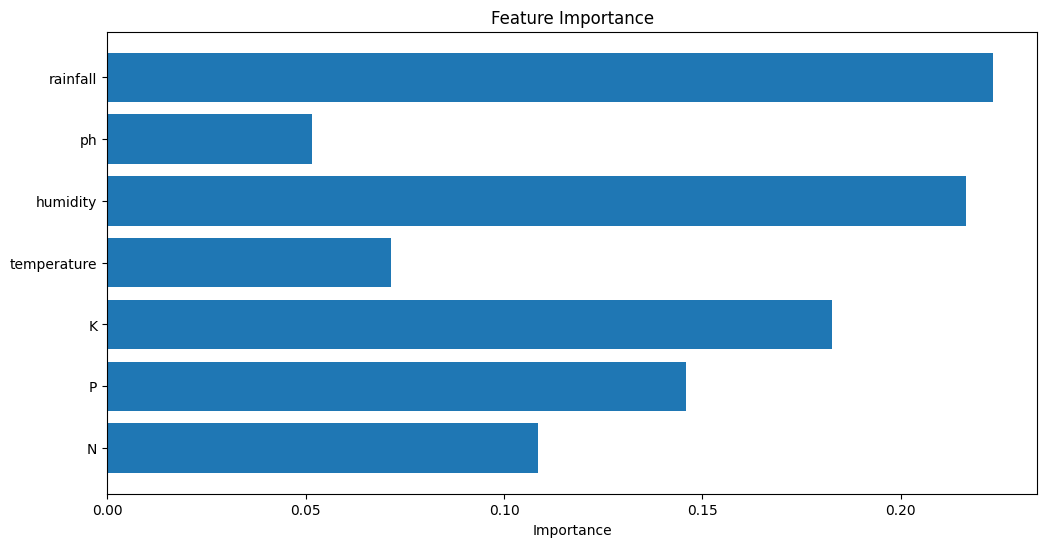

In [ ]:
# Get feature names
num_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
# Plot importance
importances = model.feature_importances_
plt.figure(figsize=(12, 6))
plt.barh(num_features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Data fields
* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %  
* ph - ph value of the soil
* rainfall - rainfall in mm

Feature importances:
*      Feature  Importance
*     rainfall    0.223202
*     humidity    0.216521
*            K    0.182701
*            P    0.145932
*            N    0.108509
*  temperature    0.071634
*           ph    0.051500
* Sum = 0.9999999999999999

In [ ]:
# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with the column names and feature importances
importance_df = pd.DataFrame({'Feature': num_features, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print("Feature importances:")
print(importance_df)
#print total
print(importance_df['Importance'].sum())


Feature importances:
       Feature  Importance
6     rainfall    0.223202
4     humidity    0.216521
2            K    0.182701
1            P    0.145932
0            N    0.108509
3  temperature    0.071634
5           ph    0.051500
0.9999999999999999


In [ ]:
# Save the model and column names to files
import pickle
with open('crop_training_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model  saved successfully!")

Model  saved successfully!


In [ ]:
#test saved model
with open('crop_training_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
#test data


In [ ]:
# Test data (example input)
test_data = {
    "N": 60,
    "P": 40,
    "K": 42,
    "temperature": 30.60,
    "humidity": 30.234,
    "ph": 6.5,
    "rainfall": 200
}

# Convert to DataFrame
test_df = pd.DataFrame([test_data])

# Make a prediction
prediction = loaded_model.predict(test_df)[0]

# Get probabilities for each crop
probabilities = loaded_model.predict_proba(test_df)[0]

# Get crop classes (labels)
crop_classes = loaded_model.classes_

# Combine crops with their probabilities
probability_dict = dict(zip(crop_classes, probabilities))

# Sort probabilities in descending order
sorted_probabilities = dict(sorted(probability_dict.items(), key=lambda item: item[1], reverse=True))

# Show results
print(f"Predicted Crop: {prediction}")
print("Prediction Probabilities:")
for crop, prob in sorted_probabilities.items():
    print(f"{crop}: {prob:.4f}")


Predicted Crop: coffee
Prediction Probabilities:
coffee: 0.3368
jute: 0.2034
papaya: 0.1300
mango: 0.1200
rice: 0.1092
pigeonpeas: 0.0368
chickpea: 0.0209
maize: 0.0113
banana: 0.0100
muskmelon: 0.0100
blackgram: 0.0050
grapes: 0.0050
kidneybeans: 0.0016
apple: 0.0000
coconut: 0.0000
cotton: 0.0000
lentil: 0.0000
mothbeans: 0.0000
mungbean: 0.0000
orange: 0.0000
pomegranate: 0.0000
watermelon: 0.0000


In [ ]:
print(crop_classes)
print(len(crop_classes))

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
22


In [ ]:
# Test data (example input)
test_data = {
    "N": 50,
    "P": 30,
    "K": 20,
    "temperature": 25.6,
    "humidity": 70,
    "ph": 6.5,
    "rainfall": 100
}

# Convert to DataFrame
test_df = pd.DataFrame([test_data])

# Make prediction
predicted_crop = loaded_model.predict(test_df)[0]

# Get probabilities for each crop
probabilities = loaded_model.predict_proba(test_df)[0]

# Get crop classes (labels)
crop_classes = loaded_model.classes_

# Combine crops with their probabilities
probability_dict = dict(zip(crop_classes, probabilities))

# Sort probabilities in descending order
sorted_probabilities = dict(sorted(probability_dict.items(), key=lambda item: item[1], reverse=True))

# Show results
print(f"Predicted Crop: {predicted_crop}")
print("Prediction Probabilities:")
for crop, prob in sorted_probabilities.items():
    print(f"{crop}: {prob:.4f}")


Predicted Crop: mango
Prediction Probabilities:
mango: 0.2434
orange: 0.1582
blackgram: 0.1342
pigeonpeas: 0.1286
mothbeans: 0.1281
maize: 0.1037
pomegranate: 0.0511
coffee: 0.0383
coconut: 0.0070
lentil: 0.0065
kidneybeans: 0.0008
papaya: 0.0002
apple: 0.0000
banana: 0.0000
chickpea: 0.0000
cotton: 0.0000
grapes: 0.0000
jute: 0.0000
mungbean: 0.0000
muskmelon: 0.0000
rice: 0.0000
watermelon: 0.0000
